## Importing the dataset

In [195]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("german_credit_data.csv",index_col=0)
dataset.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [196]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [197]:
X = dataset.iloc[:,:-1]
y = dataset['Risk']

In [198]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## Preprocessing 

In [199]:
y.replace(['good', 'bad'], [1,0], inplace=True)

In [200]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int64

In [201]:
X['Sex'].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [202]:
X = pd.get_dummies(X, columns=['Sex',], dtype=int ,drop_first=True)

In [203]:
X.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_male
0,67,2,own,NaN,little,1169,6,radio/TV,1
1,22,2,own,little,moderate,5951,48,radio/TV,0
2,49,1,own,little,NaN,2096,12,education,1
3,45,2,free,little,little,7882,42,furniture/equipment,1
4,53,2,free,little,little,4870,24,car,1


In [204]:
X = pd.get_dummies(X, columns=['Housing'], dtype=int, drop_first=True)

In [205]:
X.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_male,Housing_own,Housing_rent
0,67,2,NaN,little,1169,6,radio/TV,1,1,0
1,22,2,little,moderate,5951,48,radio/TV,0,1,0
2,49,1,little,NaN,2096,12,education,1,1,0
3,45,2,little,little,7882,42,furniture/equipment,1,0,0
4,53,2,little,little,4870,24,car,1,0,0


In [206]:
X['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [207]:
X['Saving accounts'].isna().sum()

183

In [208]:
X['Saving accounts'].replace(['little', 'moderate', 'quite rich', 'rich'], [1, 2, 3, 4], inplace=True)


In [209]:
X['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [210]:
X['Checking account'].isna().sum()

394

In [211]:
X['Checking account'].replace(['little', 'moderate',  'rich'], [1, 2, 3], inplace=True)

In [212]:
X.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_male,Housing_own,Housing_rent
0,67,2,NaN,1.0,1169,6,radio/TV,1,1,0
1,22,2,1.0,2.0,5951,48,radio/TV,0,1,0
2,49,1,1.0,NaN,2096,12,education,1,1,0
3,45,2,1.0,1.0,7882,42,furniture/equipment,1,0,0
4,53,2,1.0,1.0,4870,24,car,1,0,0


In [213]:
X['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [214]:
X.drop('Purpose', axis=1, inplace=True)

In [215]:
X.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_male,Housing_own,Housing_rent
0,67,2,NaN,1.0,1169,6,1,1,0
1,22,2,1.0,2.0,5951,48,0,1,0
2,49,1,1.0,NaN,2096,12,1,1,0
3,45,2,1.0,1.0,7882,42,1,0,0
4,53,2,1.0,1.0,4870,24,1,0,0


In [216]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [217]:
X

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_male,Housing_own,Housing_rent
0,67.0,2.0,1.6,1.0,1169.0,6.0,1.0,1.0,0.0
1,22.0,2.0,1.0,2.0,5951.0,48.0,0.0,1.0,0.0
2,49.0,1.0,1.0,2.2,2096.0,12.0,1.0,1.0,0.0
3,45.0,2.0,1.0,1.0,7882.0,42.0,1.0,0.0,0.0
4,53.0,2.0,1.0,1.0,4870.0,24.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,31.0,1.0,1.0,1.4,1736.0,12.0,0.0,1.0,0.0
996,40.0,3.0,1.0,1.0,3857.0,30.0,1.0,1.0,0.0
997,38.0,2.0,1.0,1.8,804.0,12.0,1.0,1.0,0.0
998,23.0,2.0,1.0,1.0,1845.0,45.0,1.0,0.0,0.0


# 1.Logistic Regression 

## Train-test split

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Create a Model

In [220]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

## Model training & Hyper-parameter Tuning

In [221]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l1', 'l2'],
          'solver': ['lbfgs', 'liblinear', 'newton-cg'],
          'C': np.logspace(-3,3,7)}
grid_search = GridSearchCV(lr_model, param_grid = params, cv=5)                      
grid_search.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

## Evaluation

In [222]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.010583,0.000977,0.000962,5.721716e-05,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.72500,0.68750,0.68125,0.73125,0.74375,0.71375,0.024812,1
17,0.035407,0.001398,0.001201,3.982427e-04,0.1,l2,newton-cg,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.71875,0.70000,0.66875,0.72500,0.75625,0.71375,0.028886,1
21,0.009158,0.002275,0.001397,4.879682e-04,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.71250,0.69375,0.66875,0.74375,0.74375,0.71250,0.029047,3
16,0.002593,0.000488,0.000998,2.132481e-07,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.71875,0.68750,0.66875,0.73125,0.75000,0.71125,0.029422,4
37,0.003785,0.000397,0.001003,4.174981e-06,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.72500,0.70625,0.66250,0.70000,0.76250,0.71125,0.032692,4
29,0.040966,0.004252,0.001197,3.985908e-04,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.72500,0.70625,0.66250,0.70000,0.76250,0.71125,0.032692,4
13,0.002198,0.000388,0.000997,1.409697e-06,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.71875,0.70000,0.68750,0.73125,0.71875,0.71125,0.015512,4
19,0.003487,0.000440,0.001196,4.003296e-04,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.71875,0.70625,0.66875,0.71250,0.75000,0.71125,0.026041,8
9,0.008360,0.000998,0.001203,4.106557e-04,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.71875,0.70625,0.68125,0.73750,0.71250,0.71125,0.018286,8
10,0.002802,0.000404,0.000988,1.876801e-05,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.71875,0.70625,0.68125,0.73750,0.71250,0.71125,0.018286,8


In [223]:
grid_search.best_estimator_

LogisticRegression(C=0.1)

In [224]:
y_pred = grid_search.predict(X_test)

In [225]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc, pre, rec, f1)

0.73 0.7430167597765364 0.9432624113475178 0.83125


In [226]:
from sklearn import metrics

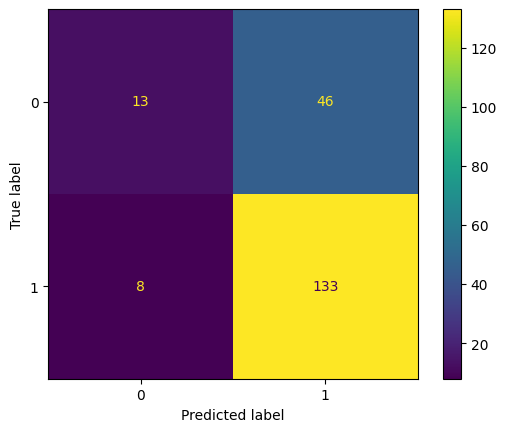

In [248]:
%matplotlib inline
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# 2. Desicion Tree

## Train-test split

In [104]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X,y, test_size=0.2, random_state=42)

## Create a Desicion Tree Model 

In [105]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

## Model training & Hyper-parameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

params_dt = {'max_depth': [5, 6, 7],
          'min_samples_split': [2, 3, 4]}

grid_search_tree = GridSearchCV(dt_model, param_grid = params_dt, cv=5)                      
grid_search_tree.fit(X_train_tree, y_train_tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [2, 3, 4]})

## Evaluation

In [107]:
pd.DataFrame(grid_search_tree.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.001996,7.231594e-07,0.001196,0.000400,6,4,"{'max_depth': 6, 'min_samples_split': 4}",0.68750,0.68750,0.65000,0.70625,0.71250,0.68875,0.021794,1
6,0.001996,3.236175e-06,0.001002,0.000012,7,2,"{'max_depth': 7, 'min_samples_split': 2}",0.68125,0.72500,0.63125,0.70000,0.70625,0.68875,0.031967,1
3,0.002198,4.131517e-04,0.001003,0.000007,6,2,"{'max_depth': 6, 'min_samples_split': 2}",0.68750,0.68750,0.65625,0.70000,0.70625,0.68750,0.017230,3
4,0.002190,3.852345e-04,0.001207,0.000395,6,3,"{'max_depth': 6, 'min_samples_split': 3}",0.68750,0.68750,0.65000,0.70000,0.71250,0.68750,0.020917,4
1,0.001994,1.969516e-06,0.001197,0.000398,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.62500,0.70000,0.67500,0.70625,0.72500,0.68625,0.034551,5
0,0.002603,4.902345e-04,0.001786,0.000395,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.62500,0.70000,0.67500,0.70000,0.72500,0.68500,0.033912,6
2,0.001994,1.649057e-06,0.000999,0.000003,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.62500,0.70000,0.67500,0.70000,0.72500,0.68500,0.033912,6
8,0.002164,3.509031e-04,0.001004,0.000014,7,4,"{'max_depth': 7, 'min_samples_split': 4}",0.67500,0.70625,0.63750,0.70625,0.69375,0.68375,0.025800,8
7,0.001977,5.563731e-05,0.001003,0.000010,7,3,"{'max_depth': 7, 'min_samples_split': 3}",0.66250,0.71250,0.61875,0.70000,0.69375,0.67750,0.033680,9


In [108]:
grid_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=4)

In [109]:
y_pred_tree = grid_search_tree.predict(X_test_tree)

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

acc_tree = accuracy_score(y_test_tree, y_pred_tree)
pre_tree = precision_score(y_test_tree, y_pred_tree)
rec_tree = recall_score(y_test_tree, y_pred_tree)
f1_tree = f1_score(y_test_tree, y_pred_tree)
print(acc_tree, pre_tree, rec_tree, f1_tree)

0.725 0.8028169014084507 0.8085106382978723 0.8056537102473498


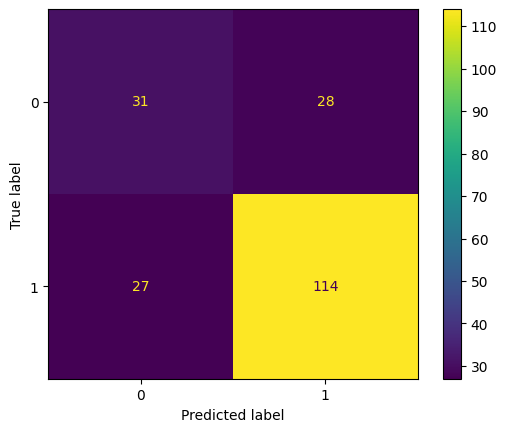

In [111]:
%matplotlib inline
ConfusionMatrixDisplay(confusion_matrix(y_test_tree, y_pred_tree)).plot()

# 3. K-Nearest Neighbors

## Train-test Split

In [138]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

## Create a Model

In [140]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

## Model training & Hyper-parameter Tuning

In [141]:
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_search_knn = GridSearchCV(knn_model, param_grid = params_knn, cv=5)                      
grid_search_knn.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

## Evaluation

In [142]:
pd.DataFrame(grid_search_knn.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,0.001194,4.022555e-04,0.002171,0.000337,manhattan,9,distance,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.71250,0.67500,0.71250,0.72500,0.75000,0.71500,0.024238,1
26,0.000996,1.963191e-05,0.004987,0.000020,manhattan,7,uniform,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei...",0.70625,0.70625,0.67500,0.72500,0.75000,0.71250,0.024686,2
0,0.001203,3.955348e-04,0.006161,0.000430,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.70000,0.71250,0.68750,0.71250,0.73750,0.71000,0.016583,3
32,0.001215,3.921963e-04,0.004851,0.000174,manhattan,13,uniform,"{'metric': 'manhattan', 'n_neighbors': 13, 'we...",0.69375,0.70000,0.70625,0.71250,0.73750,0.71000,0.015104,3
12,0.000989,1.599389e-05,0.005008,0.000012,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.70000,0.71250,0.68750,0.71250,0.73750,0.71000,0.016583,3
35,0.001193,4.010995e-04,0.002388,0.000495,manhattan,15,distance,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.69375,0.70625,0.70000,0.70625,0.73125,0.70750,0.012748,6
34,0.000995,6.652861e-06,0.004976,0.000014,manhattan,15,uniform,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.69375,0.69375,0.71875,0.68750,0.73750,0.70625,0.018957,7
33,0.001002,1.082263e-05,0.002401,0.000484,manhattan,13,distance,"{'metric': 'manhattan', 'n_neighbors': 13, 'we...",0.68750,0.68750,0.70000,0.71250,0.74375,0.70625,0.020917,7
28,0.000998,2.652346e-06,0.004974,0.000047,manhattan,9,uniform,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.71250,0.68125,0.68750,0.71250,0.73750,0.70625,0.020156,7
31,0.001193,3.933201e-04,0.002010,0.000017,manhattan,11,distance,"{'metric': 'manhattan', 'n_neighbors': 11, 'we...",0.70625,0.66250,0.71250,0.70625,0.74375,0.70625,0.025921,10


In [143]:
grid_search_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [144]:
y_pred_knn = grid_search_knn.predict(X_test_knn)

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

acc_knn = accuracy_score(y_test_knn, y_pred_knn)
pre_knn = precision_score(y_test_knn, y_pred_knn)
rec_knn = recall_score(y_test_knn, y_pred_knn)
f1_knn = f1_score(y_test_knn, y_pred_knn)
print(acc_knn, pre_knn, rec_knn, f1_knn)

0.71 0.7485029940119761 0.8865248226950354 0.8116883116883117


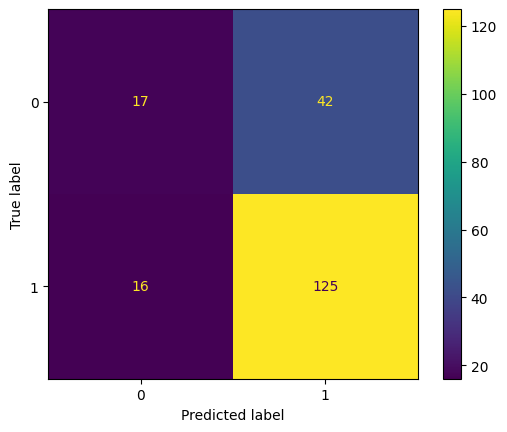

In [146]:
%matplotlib inline
ConfusionMatrixDisplay(confusion_matrix(y_test_knn, y_pred_knn)).plot()

In [231]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [243]:
sizes, training_scores, testing_scores = learning_curve(knn_model, X_train_knn, y_train_knn, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

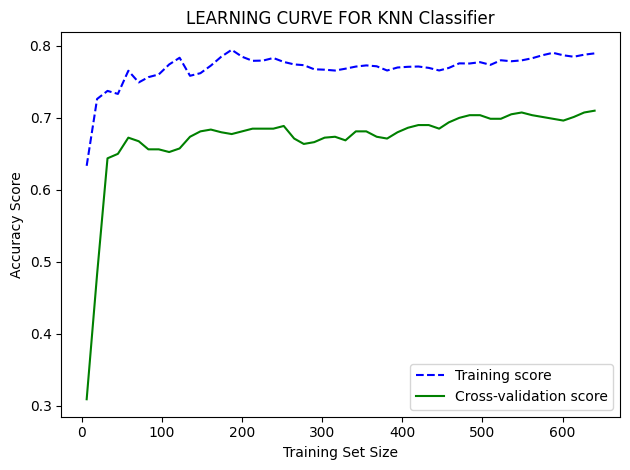

In [244]:
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [240]:
sizes, training_scores, testing_scores = learning_curve(lr_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

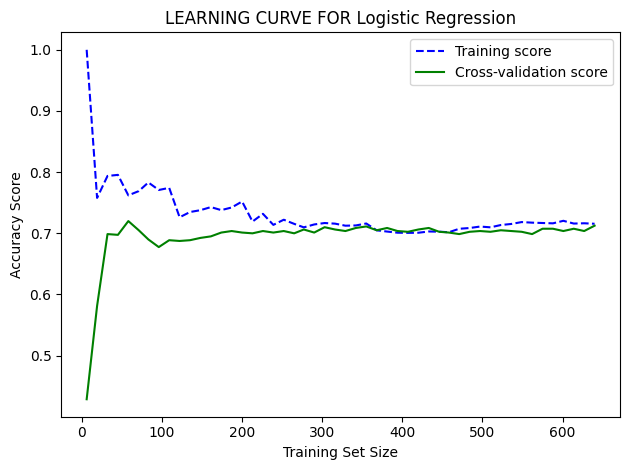

In [241]:
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Logistic Regression")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()